# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
# from tensorflow.keras.datasets import cifar100
# from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [3]:
len(np.unique(y_train))

20

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

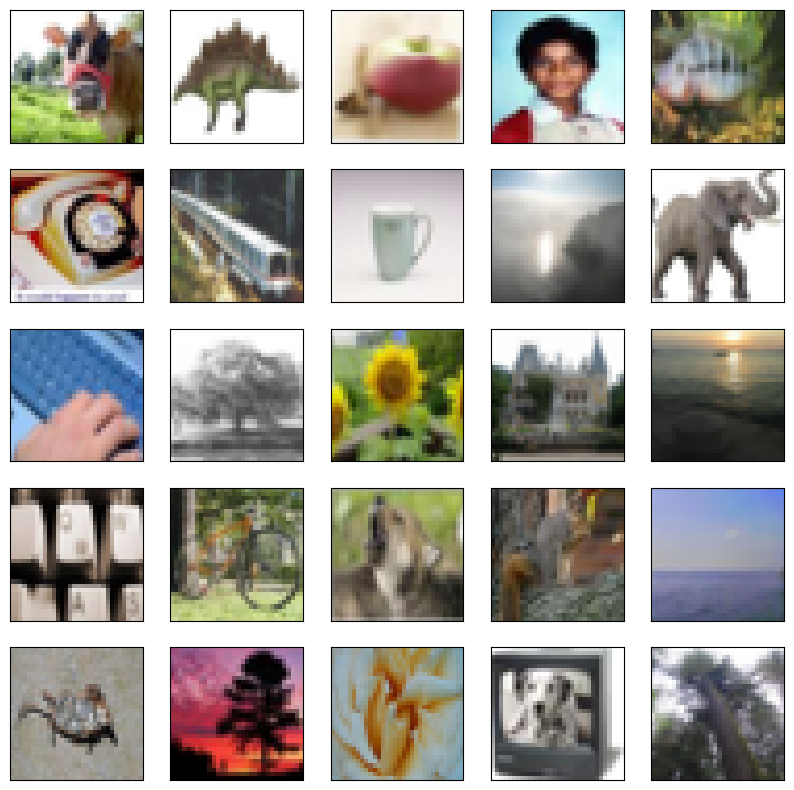

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # image = x_train[i].permute(1, 2, 0)  # Change the shape from (C, H, W) to (H, W, C)
  image = x_train[i]
  plt.imshow(image)
plt.show()

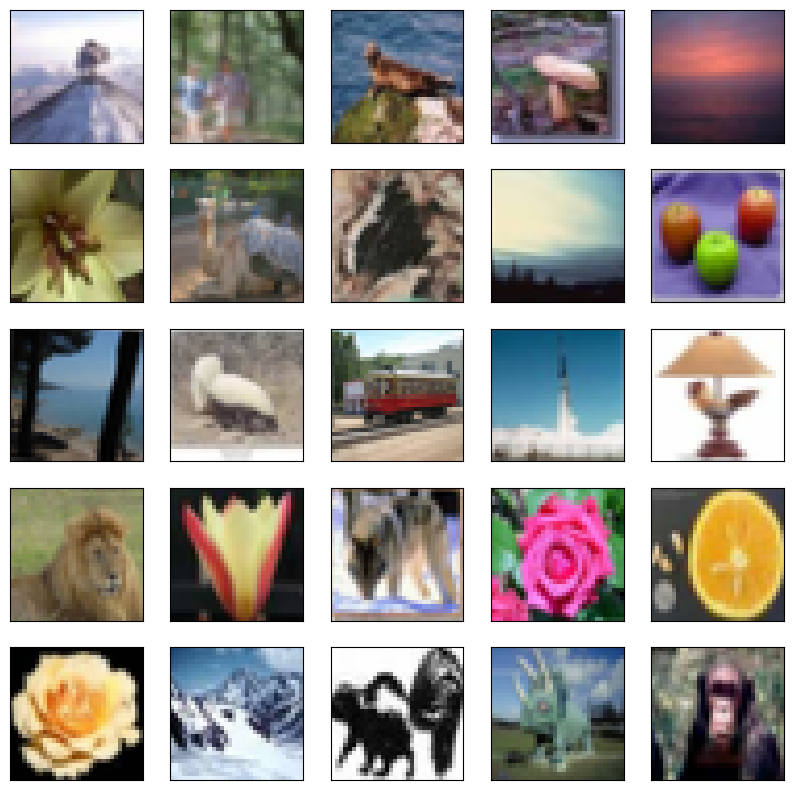

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # image = x_train[i].permute(1, 2, 0)  # Change the shape from (C, H, W) to (H, W, C)
  image = x_test[i]
  plt.imshow(image)
plt.show()

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Conv2D(128,(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(100,activation='relu'),
    Dropout(0.2),
    Dense(20,activation='sigmoid')
])

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
500/500 [==============================] - 14s 16ms/step - loss: 2.6568 - accuracy: 0.1772 - val_loss: 2.8238 - val_accuracy: 0.1720
Epoch 2/30
500/500 [==============================] - 7s 14ms/step - loss: 2.3167 - accuracy: 0.2856 - val_loss: 2.2156 - val_accuracy: 0.3095
Epoch 3/30
500/500 [==============================] - 8s 16ms/step - loss: 2.1113 - accuracy: 0.3540 - val_loss: 1.9939 - val_accuracy: 0.3819
Epoch 4/30
500/500 [==============================] - 8s 15ms/step - loss: 1.9409 - accuracy: 0.4074 - val_loss: 2.1345 - val_accuracy: 0.3678
Epoch 5/30
500/500 [==============================] - 8s 15ms/step - loss: 1.8010 - accuracy: 0.4525 - val_loss: 1.9125 - val_accuracy: 0.4297
Epoch 6/30
500/500 [==============================] - 7s 15ms/step - loss: 1.6909 - accuracy: 0.4848 - val_loss: 1.6734 - val_accuracy: 0.4843
Epoch 7/30
500/500 [==============================] - 7s 14ms/step - loss: 1.5982 - accuracy: 0.5115 - val_loss: 1.7683 - val_accuracy: 0.465

In [39]:
model.save('/content/model.keras')

Plot the training accuracy vs number of epochs graph. Print the test accuracy.

Testing accuracy: 0.5078999996185303
Training accuracy: 0.8125


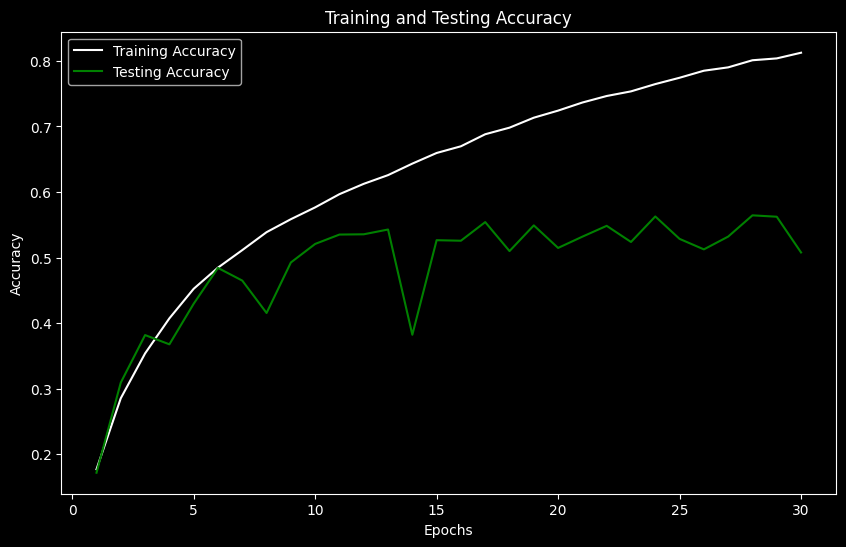

In [10]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
print(f'Testing accuracy: {val_acc[-1]}')
print(f'Training accuracy: {train_acc[-1]}')
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'w', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [11]:
res_model=Sequential([
    Conv2D(64,(7,7),strides=(2,2),padding='same',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((3,3),strides=(2,2)),
    Conv2D(64,(3,3),strides=(2,2),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128,(3,3),strides=(1,1),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256,(3,3),strides=(1,1),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(512,(3,3),strides=(1,1),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    GlobalAveragePooling2D(),
    Dense(20,activation='softmax')
])

In [16]:
res_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

res_history=res_model.fit(x_train, y_train, batch_size=60, epochs=35, validation_data=(x_test,y_test))


Epoch 1/35
834/834 [==============================] - 11s 10ms/step - loss: 1.5017 - accuracy: 0.5280 - val_loss: 2.0970 - val_accuracy: 0.3906
Epoch 2/35
834/834 [==============================] - 6s 7ms/step - loss: 1.2738 - accuracy: 0.5964 - val_loss: 2.2603 - val_accuracy: 0.4104
Epoch 3/35
834/834 [==============================] - 7s 8ms/step - loss: 1.1174 - accuracy: 0.6424 - val_loss: 1.9270 - val_accuracy: 0.4439
Epoch 4/35
834/834 [==============================] - 7s 8ms/step - loss: 0.9841 - accuracy: 0.6832 - val_loss: 1.7969 - val_accuracy: 0.4835
Epoch 5/35
834/834 [==============================] - 7s 8ms/step - loss: 0.8477 - accuracy: 0.7254 - val_loss: 1.6435 - val_accuracy: 0.5282
Epoch 6/35
834/834 [==============================] - 7s 8ms/step - loss: 0.7286 - accuracy: 0.7630 - val_loss: 2.0938 - val_accuracy: 0.4746
Epoch 7/35
834/834 [==============================] - 7s 9ms/step - loss: 0.6061 - accuracy: 0.8005 - val_loss: 1.9607 - val_accuracy: 0.5092
Epoc

Testing accuracy: 0.5577999949455261
Training accuracy: 0.9812399744987488


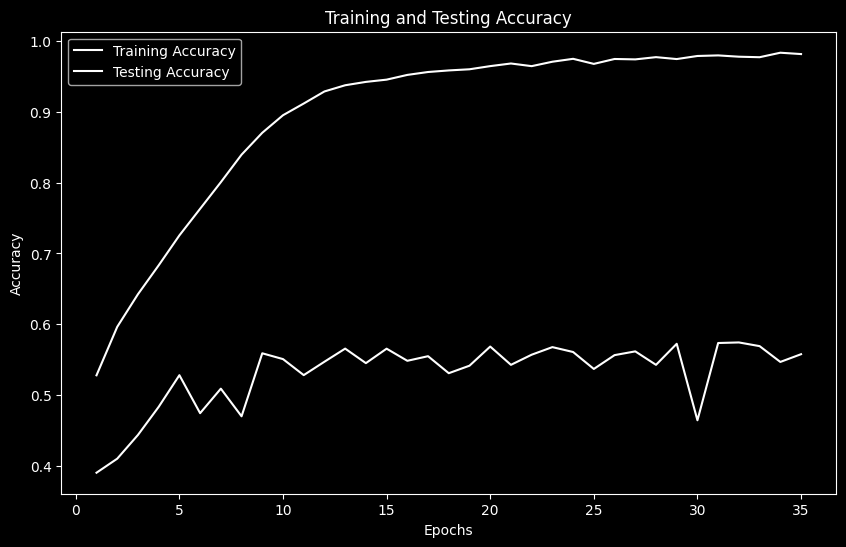

In [17]:
train_acc = res_history.history['accuracy']
val_acc = res_history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
print(f'Testing accuracy: {val_acc[-1]}')
print(f'Training accuracy: {train_acc[-1]}')
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'w', label='Training Accuracy')
plt.plot(epochs, val_acc, 'w', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [48]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, optimizers, losses, datasets
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import History

Load the data.

In [32]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [34]:
dataset.drop(columns=['Car Name'],inplace=True)
dataset = dataset.fillna(dataset.mean())
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [35]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
dataset=pd.get_dummies(dataset,columns=['Origin'])
bool_cols = ['Origin_1', 'Origin_2', 'Origin_3']
dataset[bool_cols] = dataset[bool_cols].astype(int)

In [37]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin_1      398 non-null    int64  
 8   Origin_2      398 non-null    int64  
 9   Origin_3      398 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 31.2 KB


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [38]:
# Separate the target variable from the features in the dataset.
y=dataset['MPG']
X=dataset.drop(columns=['MPG'])
# X.head()
# X.info()

In [39]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [40]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You may have given different name to your train and test data.


# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [55]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(9,)),
    BatchNormalization(),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='relu'),
    Dense(1,activation='relu')
])


model.compile(optimizer=Adam(learning_rate=0.0005),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test_scaled,y_test))
# model.summary()


Epoch 1/100
10/10 [==============================] - 3s 29ms/step - loss: 574.3144 - val_loss: 579.8624
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 498.8042 - val_loss: 565.7286
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 405.3669 - val_loss: 542.0416
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 307.0411 - val_loss: 507.0065
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 211.9391 - val_loss: 457.5404
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 131.4276 - val_loss: 394.5006
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 78.3376 - val_loss: 328.0352
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 56.6172 - val_loss: 274.0509
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 36.4365 - val_loss: 231.2917
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 

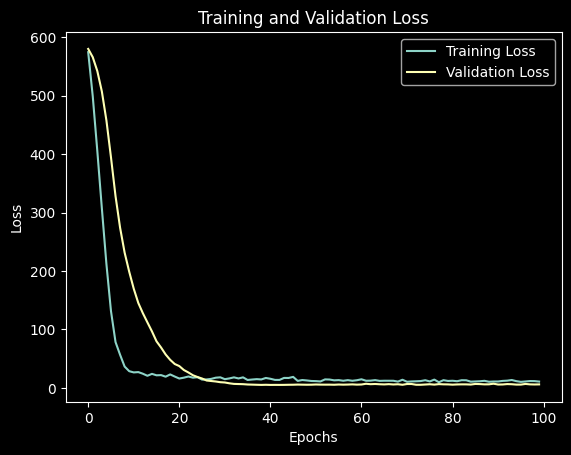

'...'

In [60]:
#Plot the Loss from the history..
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss if available
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
"..."

In [64]:
# Evaluate the model on the test set
y_predicted = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE) on test data: {mse}")
y_predicted

3/3 [==============================] - 0s 4ms/step
Mean Squared Error (MSE) on test data: 5.962245870689131


array([[32.929123 ],
       [28.623465 ],
       [18.861631 ],
       [15.267499 ],
       [12.717338 ],
       [27.570683 ],
       [26.244122 ],
       [13.167289 ],
       [14.5685   ],
       [19.453978 ],
       [14.929186 ],
       [37.1227   ],
       [23.52424  ],
       [14.11234  ],
       [23.149372 ],
       [12.01031  ],
       [27.990053 ],
       [19.708004 ],
       [14.867234 ],
       [36.84829  ],
       [26.789633 ],
       [18.856455 ],
       [30.308672 ],
       [29.74314  ],
       [16.690413 ],
       [47.44688  ],
       [27.165575 ],
       [24.428923 ],
       [21.378792 ],
       [12.555789 ],
       [27.325956 ],
       [35.75514  ],
       [18.36874  ],
       [25.43403  ],
       [36.814003 ],
       [13.789496 ],
       [24.324854 ],
       [19.163263 ],
       [14.006055 ],
       [26.58293  ],
       [26.044098 ],
       [30.024824 ],
       [23.400564 ],
       [10.621261 ],
       [23.72888  ],
       [35.25205  ],
       [27.37486  ],
       [22.06